In [233]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io

# Load dataset of our own handwritten letters

In [234]:
# Load all char datasets of own handwriting to create larger dataset
# chars1, chars2, chars3

data1 = np.load('data/training/chars1.npy')
data2 = np.load('data/training/chars2.npy')
data3 = np.load('data/training/chars3.npy')

np.concatenate
data_total = np.concatenate((data1, data2, data3))
data_total.shape

(77, 28, 28)

## Normalize data

In [235]:
data = data_total/255

## Initialized once
# y = np.empty(data.shape[0], dtype=np.uint8)
y = np.array([7,14,15,4,19,7,8,18,22,99,10,18,99,5,11,13,0,15,17,14,9,4,2,19
,19,7,8,18,8,18,0,99,12,15,11,4,99,23,19,19,7,4,99,99,14,13,99,17
,8,15,19,0,19,7,8,17,3,11,8,13,4,99,19,4,23,19,5,8,13,0,11,12
,4,18,18,0,99])

## Labelling data

In [236]:
chars = 'abcdefghijklmnopqrstuvwxyz'
## Unrecognized character gives 99
def encode_char(x):
    try:
        i = chars.index(x)
        return i
    except ValueError:
        return 99

[ 7 14 15  4 19  7  8 18 22 99 10 18 99  5 11 13  0 15 17 14  9  4  2 19
 19  7  8 18  8 18  0 99 12 15 11  4 99 23 19 19  7  4 99 99 14 13 99 17
  8 15 19  0 19  7  8 17  3 11  8 13  4 99 19  4 23 19  5  8 13  0 11 12
  4 18 18  0 99]


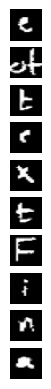

In [237]:
fig, axes = plt.subplots(10)
for i in range(60,70):
    axes[i%10].imshow(data[i,:,:], cmap = "gray")
    axes[i%10].axis('off')

# Manually set labels...
# labels = 'e,-,t,e,x,t,f,i,n,a'.split(',')
# y[60:70] = [encode_char(x) for x in labels]
#print(np.shape(y))
print(y)

## Show data

Char datset shape:  (77, 28, 28)


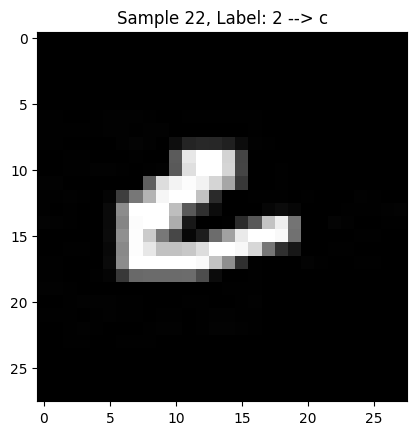

In [269]:
print("Char datset shape: ", data.shape)
k = np.random.randint(0, len(data))
char = data[k,:,:]
plt.imshow(char, cmap='gray')
label = y[k,]

if label == 99:
    true_char = 'unknown'
else:
    true_char = chars[label]

plt.title('Sample ' + str(k) + ', Label: '+ str(label) + ' --> ' + str(true_char));

# Load EMNIST dataset

In [265]:
emnist = scipy.io.loadmat('data/training/emnist-letters.mat')
emnist_data = emnist['dataset']

X_train = emnist_data['train'][0,0]['images'][0,0]
y_train = emnist_data['train'][0,0]['labels'][0,0]
X_test = emnist_data['test'][0,0]['images'][0,0]
y_test = emnist_data['test'][0,0]['labels'][0,0]


## Create validation set
val_start = X_train.shape[0] - X_test.shape[0]
X_val = X_train[val_start:X_train.shape[0],:]
y_val = y_train[val_start:X_train.shape[0]]
X_train = X_train[0:val_start,:]
y_train = y_train[0:val_start]

print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

print("X validation shape: ", X_val.shape)
print("y validation shape: ", y_val.shape)

X train shape:  (104000, 784)
y train shape:  (104000, 1)
X test shape:  (20800, 784)
y test shape:  (20800, 1)
X validation shape:  (20800, 784)
y validation shape:  (20800, 1)


(104000, 28, 28)

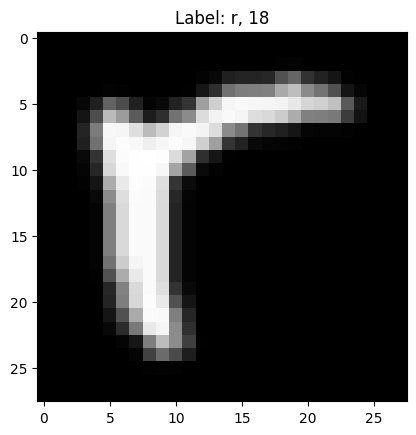

In [267]:
X_train = X_train.reshape((X_train.shape[0], 28, 28), order='F')

random_sample = np.random.randint(0, len(X_train))
char = X_train[random_sample,:,:]
label_i = y_train[random_sample,0]
# Translate labels to letter
letters = 'abcdefghijklmnopqrstuvwxyz'
label = letters[label_i-1]

plt.imshow(char, cmap='gray')
plt.title(f'Label: {label}, {label_i}')

X_train.shape